In [ ]:
"""
Discharge Data Analysis

This script analyzes hydrological discharge data to explore patterns over time. 
It reads data with datetime and discharge values, and utilizes Pandas for data manipulation and Matplotlib 
for generating several types of plots. The plots include time series of daily discharges, monthly averages, 
histograms, box plots by month, and rolling averages to visualize trends and variability in discharge rates.

Functions:
- Plot time series of daily discharge rates.
- Calculate and plot monthly average discharge.
- Generate and display histograms of discharge frequencies.
- Create box plots to examine monthly discharge variability.
- Compute and plot 7-day rolling averages of discharge.

Usage:
- Ensure Python environment has Pandas and Matplotlib installed.
- Data file should be named 'Raw_Data_03431700/Raw_Discharge_03431700.csv' with 'datetimeUTC' and 'discharge_cfs' columns.
- Execute script to generate plots, which will be displayed on screen.

Dependencies: pandas, matplotlib
"""


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/TN_2012/Raw_Data/Raw_Data_03431700/Raw_Discharge_03431700.csv"
data = pd.read_csv(file, parse_dates=['datetimeUTC'])
data.set_index('datetimeUTC', inplace=True)


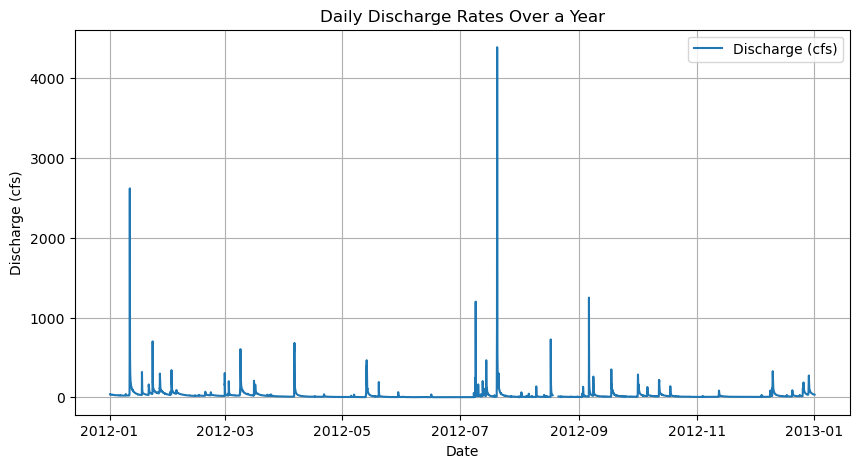

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['discharge_cfs'], label='Discharge (cfs)')
plt.title('Daily Discharge Rates Over a Year')
plt.xlabel('Date')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.grid(True)
plt.show()


discharge_cfs    float64
qualifiers        object
Month              int32
Rolling_Mean     float64
dtype: object


C:\Users\mgalib\AppData\Local\Temp\ipykernel_22684\3890472941.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = data[['discharge_cfs']].resample('M').mean()  # Using double brackets to ensure DataFrame structure


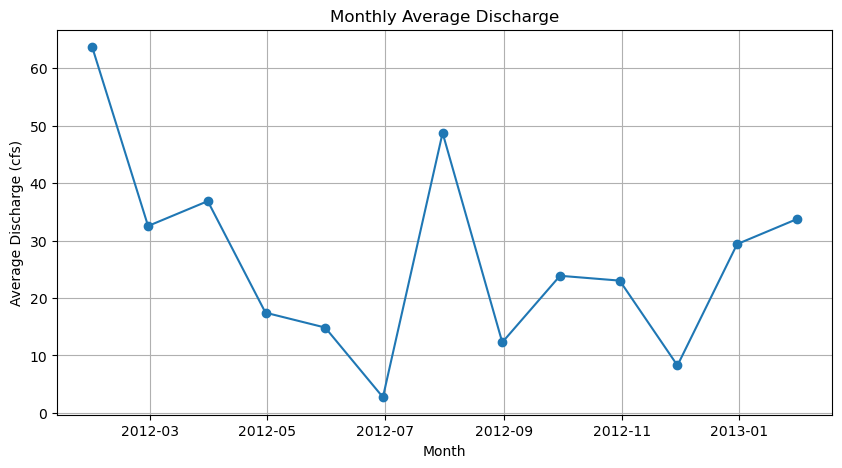

In [11]:
# First, let's explicitly check all column data types again
print(data.dtypes)

# Exclude non-numeric columns manually in aggregation if necessary
if 'Month' in data.columns:
    data['Month'] = data.index.month  # Ensure 'Month' is correctly calculated

# Now, attempt the monthly average calculation by explicitly selecting the numeric column
monthly_average = data[['discharge_cfs']].resample('M').mean()  # Using double brackets to ensure DataFrame structure

# Plotting the monthly averages
plt.figure(figsize=(10, 5))
plt.plot(monthly_average.index, monthly_average['discharge_cfs'], marker='o')
plt.title('Monthly Average Discharge')
plt.xlabel('Month')
plt.ylabel('Average Discharge (cfs)')
plt.grid(True)
plt.show()




<Figure size 1000x500 with 0 Axes>

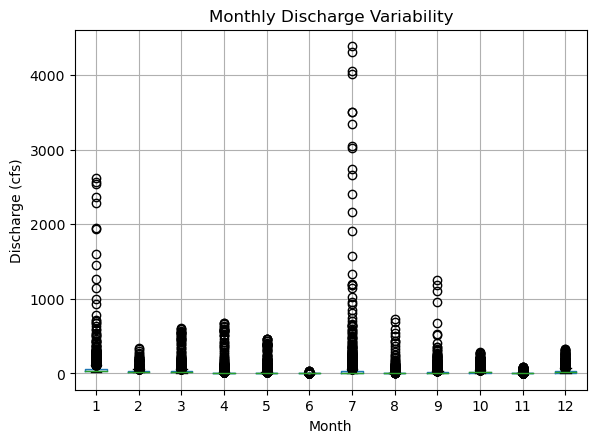

In [5]:
data['Month'] = data.index.month
plt.figure(figsize=(10, 5))
data.boxplot(column='discharge_cfs', by='Month')
plt.title('Monthly Discharge Variability')
plt.xlabel('Month')
plt.ylabel('Discharge (cfs)')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.show()


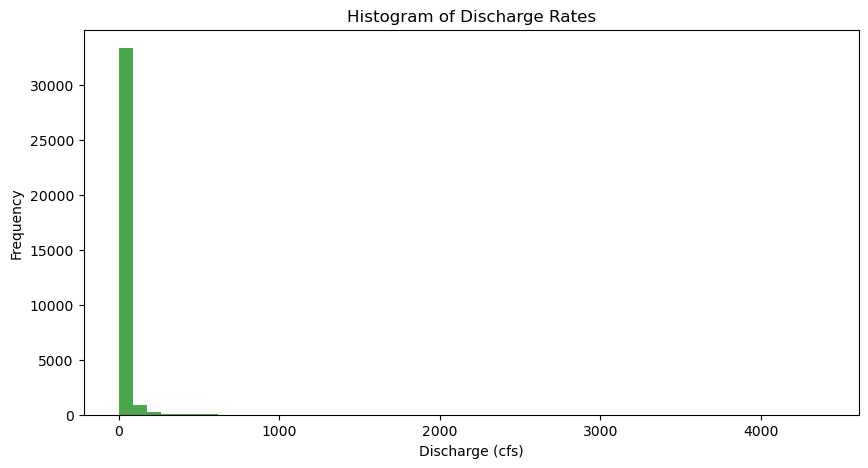

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(data['discharge_cfs'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Discharge Rates')
plt.xlabel('Discharge (cfs)')
plt.ylabel('Frequency')
plt.show()


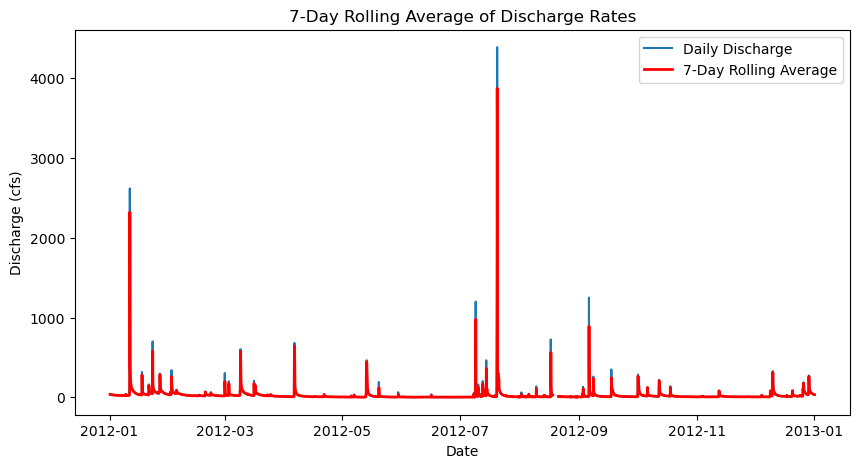

In [7]:
data['Rolling_Mean'] = data['discharge_cfs'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['discharge_cfs'], label='Daily Discharge')
plt.plot(data.index, data['Rolling_Mean'], color='red', linewidth=2, label='7-Day Rolling Average')
plt.title('7-Day Rolling Average of Discharge Rates')
plt.xlabel('Date')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.show()
